In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Path of source files

In [0]:
#basepath = 'F://JavaWorkspace//'

basepath = 'F://JavaWorkspace//AST_Compile\\src\\com\\nabeelkhan\\ast_paerser_py4j\\'

### Define the source code language 

In [0]:
ext = ['.java']

### Walking a directory tree and fatch source files

In [0]:
dt = [];
for dirpath, dirnames, files in os.walk(basepath):
    #print(f'Found directory: {dirpath}')
    for f in files:
        for e in ext:
            if(str(f).find(e) != -1):
                if((str(f).find(e)+len(e)) == len(f)):
                    #print(dirpath," - ",str(f)," - ",str(f).find(e)," - ",len(f))    
                    with open(dirpath+"\\"+f, 'r') as f:
                        data = f.read()
                        dt.append({
                                "hash":hash(str(f.name)),
                                "path":f.name,
                                "source_code":data
                             })
                        #print(dt);


###  Init DataFrame

In [0]:
dataFrame = pd.DataFrame(dt)
dataFrame

,hash,path,source_code
0,2238145654833312290,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
1,-4963274179389992491,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."


In [0]:
dataFrame.path[0]

'F://JavaWorkspace//AST_Compile\\src\\com\\nabeelkhan\\ast_paerser_py4j\\\\Code_Similarity.java'

#### TODO: For Multiple Project in provided root path 

# Try to get the Code similarity ratio using Text Similarity

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

**Two Codes Samples for Testing**

In [0]:
code_1 = """ 
import java.security.MessageDigest;

public class Program {
	
    public static String getSHA256(String str) {
       
    	//return SHA_256(str);
        
    	return mySHA_256(str);
        
    }


    public static String mySHA_256(String s){

    	byte[] bytes = s.getBytes();
  	  	StringBuilder binary = new StringBuilder();
  	  	
  	  	for (byte b : bytes)
  	  	{
  	     int val = b*99;	
  	     for (int i = 0; i < 8; i++)
  	     {
  	        binary.append((val & 128) == 0 ? 0 : 1);
  	        val <<= 1;
  	     }
  	  }

  	  //String[] hex={"f","e","d","c","b","a","9","8","7","6","5","4","3","2","1"};
  	  int[] weight = {8,4,2,1};
  	  int inCont = 0;
  	  String[] hex={"0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f"};
  	  String hexdecnum="";
        
  	  int rem,x = 0;
  	  for(int i=0;i<binary.length();i++)
  	   {
  		  
  		  if(i%4 == 0 && i!=0)
  		  {
  			  hexdecnum += hex[x];
  			  inCont=0;
  	    	  x = 0;
  		  }
  		  else if(i>=binary.length()-1)
  			  hexdecnum += hex[x];
  	   
  	    rem = binary.charAt(i);
  		inCont++;
  	    if(rem ==49){
  	    	if(inCont==1){	x+=weight[0];	}
  	    	else if (inCont==2){	x+=weight[1];	}
  	    	else if (inCont==3){	x+=weight[2];	}
  	    	else if (inCont==4){	x+=weight[3];	}
  	    	
  	    }
  	   }
    	 return hexdecnum;
    }


  
    
    
    
    
    
    
    private static String SHA_256(String str) {
		MessageDigest messageDigest;
        String encodeStr = "";
        try {
            messageDigest = MessageDigest.getInstance("SHA-256");
            messageDigest.update(str.getBytes("UTF-8"));
            encodeStr = byte2Hex(messageDigest.digest());
        } catch (Exception e) {
            System.out.println("getSHA256 is error" + e.getMessage());
        }
        return encodeStr;
	}

    private static String byte2Hex(byte[] bytes) {
        StringBuilder builder = new StringBuilder();
        String temp;
        for (int i = 0; i < bytes.length; i++) {
            temp = Integer.toHexString(bytes[i] & 0xFF);
            if (temp.length() == 1) {
                builder.append("0");
            }
            builder.append(temp);
        }
        return builder.toString();
    }
}
"""

In [0]:
code_2 = """ import java.security.MessageDigest;

public class HashTest {
	
	
	
	
    public static void main(String[] args){

    	String s = "1524405906978Genisis Block0";
    	  byte[] bytes = s.getBytes();
    	  StringBuilder binary = new StringBuilder();
    	  for (byte b : bytes)
    	  {
    	     int val = b;	//%23249425;
    	     for (int i = 0; i < 8; i++)
    	     {
    	        binary.append((val & 128) == 0 ? 0 : 1);
    	        val <<= 1;
    	     }
    	   //  binary.append(" ");
    	  }
    	  
    	  System.out.println("'" + (int) s.charAt(0) + "'\n to binary: " + binary);

    	  //String[] hex={"f","e","d","c","b","a","9","8","7","6","5","4","3","2","1"};
    	  int[] weight = {8,4,2,1};
    	  int inCont = 0;
    	  String[] hex={"0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f"};
    	  String hexdecnum="";
          
    	  int rem,x = 0;
    	  for(int i=0;i<binary.length();i++)
    	   {
    		  
    		  if(i%4 == 0 && i!=0)
    		  {
    			  hexdecnum += hex[x];
    			  inCont=0;
    	    	  x = 0;
    		  }
    		  else if(i>=binary.length()-1)
    			  hexdecnum += hex[x];
    	   
    	    rem = binary.charAt(i);
    		inCont++;
    	    if(rem ==49){
    	    	if(inCont==1){	x+=weight[0];	}
    	    	else if (inCont==2){	x+=weight[1];	}
    	    	else if (inCont==3){	x+=weight[2];	}
    	    	else if (inCont==4){	x+=weight[3];	}
    	    	
    	    }
    	   }
    	  System.out.println("\n to Hex: " + hexdecnum + "\n size: " + hexdecnum.length());
    	  }

    	public String getSHA256(String str) {	     
		    String encodedString = "";
		       int i=0;
		       while(i<str.length()){
		    	   int sum = (int) str.charAt(i) * 99; 
		    	   i++;
		       }
		    	
		       return encodedString;
		    	// return SHA256(str);
		    }

	private static String SHA256(String str) {
		MessageDigest messageDigest;
        String encodeStr = "";
        try {
            messageDigest = MessageDigest.getInstance("SHA-256");
            messageDigest.update(str.getBytes("UTF-8"));
            encodeStr = byte2Hex(messageDigest.digest());
        } catch (Exception e) {
            System.out.println("getSHA256 is error" + e.getMessage());
        }
        return encodeStr;
	}

    private static String byte2Hex(byte[] bytes) {
        StringBuilder builder = new StringBuilder();
        String temp;
        for (int i = 0; i < bytes.length; i++) {
            temp = Integer.toHexString(bytes[i] & 0xFF);
            if (temp.length() == 1) {
                builder.append("0");
            }
            builder.append(temp);
        }
        return builder.toString();
    }
}"""

In [0]:
code_3 =""" public class Test {

	public static void main(String[] args) {
		
		
//		example of java ArrayList hash function
//		String[] list1 = {"a","b","c"};
//		String[] list2 = {"aa","b","c"};
//		System.out.println(Arrays.hashCode(list1));
//		System.out.println(Arrays.hashCode(list2));
		
//		BlockChain blockChain1 = new BlockChain();
//			
//			Block newBlock1 = blockChain1.generateNextBlock("ffffffff");
//			blockChain1.addBlock(newBlock1);
//			
//			Block newBlock2 = blockChain1.generateNextBlock("gggggggg");
//			blockChain1.addBlock(newBlock2);
//			
//			Block newBlock3 = blockChain1.generateNextBlock("hhhhhhhh");
//			blockChain1.addBlock(newBlock3);
//			
//			Block newBlock4 = blockChain1.generateNextBlock("iiiiiiii");
//			blockChain1.addBlock(newBlock4);
//			
//			System.out.println(blockChain1.toString());
			new nonStaticThrades();
			
			
		}

}"""

In [87]:
dataFrame = pd.DataFrame(data={'hash':[1,2,3],'source_code':[code_1.replace('\n',''),code_2.replace('\n',''),code_3.replace('\n','')]})
data= dataFrame.source_code
print(data)

0     import java.security.MessageDigest;public cla...
1     import java.security.MessageDigest;    \t   }...
2     public class Test {\tpublic static void main(...
Name: source_code, dtype: object


# **Create the Document Term Matrix**


In [100]:
vect=CountVectorizer()
sparse_matrix = vect.fit_transform(dataFrame.source_code)
sparse_matrix.toarray()

array([[ 1,  1,  1,  1,  1,  0,  0,  3,  0,  0,  0,  5,  0,  0,  0,  4,
         3,  2,  5,  1,  1,  1,  1,  4,  0,  3,  1,  0,  1,  0,  4,  0,
         0,  2,  1,  1,  2,  0,  0,  0,  1,  4,  4,  0,  8,  0,  1,  7,
         7,  1,  1,  1,  4,  0,  0,  0,  7,  2,  2,  0,  0,  0,  0,  0,
         0,  1,  1,  0,  2,  3,  3,  5,  1,  1,  2,  0,  4,  5, 12,  4,
         0,  1,  4,  0,  0,  1,  1,  1,  1,  1,  3,  0,  5,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  2,  0,  0,  0,  1,  0,
         3,  0,  0,  1,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  1,  1,  0,  1,  0,  2,  1,  0,  0,  1,  0,  3,  3,  0,
         1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  4,  0,  1,  1,  2,  0,  4,  2, 10,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,
      

In [101]:
print(vect.get_feature_names())

['0xff', '128', '256', '49', '99', 'aa', 'addblock', 'append', 'args', 'arraylist', 'arrays', 'binary', 'block', 'blockchain', 'blockchain1', 'builder', 'byte', 'byte2hex', 'bytes', 'catch', 'charat', 'class', 'digest', 'else', 'encodedstring', 'encodestr', 'error', 'example', 'exception', 'ffffffff', 'for', 'function', 'generatenextblock', 'getbytes', 'getinstance', 'getmessage', 'getsha256', 'gggggggg', 'hash', 'hashcode', 'hashfunction', 'hex', 'hexdecnum', 'hhhhhhhh', 'if', 'iiiiiiii', 'import', 'incont', 'int', 'integer', 'is', 'java', 'length', 'list1', 'list2', 'main', 'messagedigest', 'mysha_256', 'new', 'newblock1', 'newblock2', 'newblock3', 'newblock4', 'nonstaticthrades', 'of', 'out', 'println', 'priva', 'private', 'public', 'rem', 'return', 'security', 'sha', 'sha_256', 'size', 'static', 'str', 'string', 'stringbuilder', 'sum', 'system', 'temp', 'test', 'to', 'tohexstring', 'tostring', 'try', 'update', 'utf', 'val', 'void', 'weight', 'while']


# **Create the Document Term Matrix**


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [103]:
tfidf_transformer = TfidfTransformer(norm=None)
tfidf_transformer

TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False, use_idf=True)

In [104]:
tfidf = tfidf_transformer.fit_transform(word_freq.toarray())
tfidf

<3x94 sparse matrix of type '<class 'numpy.float64'>'
	with 124 stored elements in Compressed Sparse Row format>

In [105]:
tfidf.toarray()

array([[ 1.69314718,  1.69314718,  1.69314718,  1.69314718,  1.28768207,
         0.        ,  0.        ,  5.07944154,  0.        ,  0.        ,
         0.        ,  8.4657359 ,  0.        ,  0.        ,  0.        ,
         5.15072829,  5.07944154,  3.38629436,  8.4657359 ,  1.69314718,
         1.28768207,  1.28768207,  1.69314718,  6.77258872,  0.        ,
         5.07944154,  1.69314718,  0.        ,  1.69314718,  0.        ,
         6.77258872,  0.        ,  0.        ,  3.38629436,  1.69314718,
         1.69314718,  2.57536414,  0.        ,  0.        ,  0.        ,
         1.69314718,  5.15072829,  5.15072829,  0.        , 13.54517744,
         0.        ,  1.28768207, 11.85203026,  9.01377451,  1.69314718,
         1.69314718,  1.        ,  5.15072829,  0.        ,  0.        ,
         0.        ,  9.01377451,  3.38629436,  2.57536414,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  3.3

### **Convert Matrix to  Dataframe**


In [0]:
df = pd.DataFrame(sparse_matrix.toarray(), 
                  columns=vect.get_feature_names(), 
                  index=['code_1', 'code_2','code_3'])

In [108]:
df.head()

,0xff,128,256,49,99,aa,addblock,append,args,arraylist,arrays,binary,block,blockchain,blockchain1,builder,byte,byte2hex,bytes,catch,charat,class,digest,else,encodedstring,encodestr,error,example,exception,ffffffff,for,function,generatenextblock,getbytes,getinstance,getmessage,getsha256,gggggggg,hash,hashcode,...,list2,main,messagedigest,mysha_256,new,newblock1,newblock2,newblock3,newblock4,nonstaticthrades,of,out,println,priva,private,public,rem,return,security,sha,sha_256,size,static,str,string,stringbuilder,sum,system,temp,test,to,tohexstring,tostring,try,update,utf,val,void,weight,while
code_1,1,1,1,1,1,0,0,3,0,0,0,5,0,0,0,4,3,2,5,1,1,1,1,4,0,3,1,0,1,0,4,0,0,2,1,1,2,0,0,0,...,0,0,7,2,2,0,0,0,0,0,0,1,1,0,2,3,3,5,1,1,2,0,4,5,12,4,0,1,4,0,0,1,1,1,1,1,3,0,5,0
code_2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,2,1,0,0,1,0,3,3,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1
code_3,0,0,0,0,0,1,4,0,1,1,2,0,4,2,10,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,4,0,0,0,0,1,1,2,...,2,1,0,0,2,2,2,2,2,1,1,3,3,0,0,2,0,0,0,0,0,0,1,0,3,0,0,3,0,1,0,0,1,0,0,0,0,1,0,0


In [109]:
df[:1][:]

,0xff,128,256,49,99,aa,addblock,append,args,arraylist,arrays,binary,block,blockchain,blockchain1,builder,byte,byte2hex,bytes,catch,charat,class,digest,else,encodedstring,encodestr,error,example,exception,ffffffff,for,function,generatenextblock,getbytes,getinstance,getmessage,getsha256,gggggggg,hash,hashcode,...,list2,main,messagedigest,mysha_256,new,newblock1,newblock2,newblock3,newblock4,nonstaticthrades,of,out,println,priva,private,public,rem,return,security,sha,sha_256,size,static,str,string,stringbuilder,sum,system,temp,test,to,tohexstring,tostring,try,update,utf,val,void,weight,while
code_1,1,1,1,1,1,0,0,3,0,0,0,5,0,0,0,4,3,2,5,1,1,1,1,4,0,3,1,0,1,0,4,0,0,2,1,1,2,0,0,0,...,0,0,7,2,2,0,0,0,0,0,0,1,1,0,2,3,3,5,1,1,2,0,4,5,12,4,0,1,4,0,0,1,1,1,1,1,3,0,5,0


# **Compute Cosine Similarity**

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
df_cs = pd.DataFrame(cosine_similarity(df))
df_cs


,0,1,2
0,1.000000,0.595333,0.145611
1,0.595333,1.000000,0.177778
2,0.145611,0.177778,1.000000


## Plot Heat Map


In [0]:
import seaborn as sns;

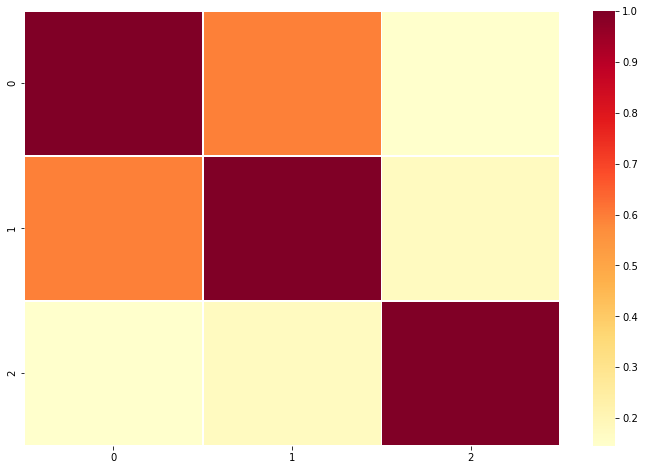

In [140]:
#sns.heatmap(df_cs)
plt.figure(figsize=(12, 8))
sns.heatmap(df_cs, linewidths=.5,cmap='YlOrRd')
#plt.pcolor(df_cs)
#plt.yticks(np.arange(0.5, len(df_cs.index), 1), df_cs.index)
#plt.xticks(np.arange(0.5, len(d.columns), 1), df.columns)
#plt.show()

#  **Using Py4J without pre-determined ports (dynamic port number)**
 

In [0]:
from py4j.java_gateway import (
    JavaGateway, CallbackServerParameters, GatewayParameters,
    launch_gateway)


par = CallbackServerParameters(
    address='127.0.0.1',
    port=25334,
    daemonize=False,
    daemonize_connections=False,
    eager_load=True,
    ssl_context=None,
    accept_timeout='DEFAULT',
    read_timeout=None,
    propagate_java_exceptions=False,
    auth_token=None,
)


##  Start Gateway
 

In [0]:

gateway = JavaGateway(callback_server_parameters=par)
print("gateway.gateway_parameters.port",gateway.gateway_parameters.port)
# retrieve the port on which the python callback server was bound to

python_port = gateway.get_callback_server().get_listening_port()
print("get_callback_server python_port: ",python_port)

gateway.gateway_parameters.port 25333
get_callback_server python_port:  25334


## Call For shutdown

In [0]:

#gateway.shutdown()


# launch Java side with dynamic port and get back the port on which the
# server was bound to.
#port = launch_gateway 
''' launch_gateway(
    port=0,
    jarpath='',
    classpath='',
    javaopts=[],
    die_on_exit=True,
    redirect_stdout=None,
    redirect_stderr=None,
    daemonize_redirect=True,
    java_path='java',
    create_new_process_group=False,
    enable_auth=False,
    cwd=None,
    return_proc=False,
)

# connect python side to Java side with Java dynamic port and start python
# callback server with a dynamic port
gateway = JavaGateway(
    gateway_parameters=GatewayParameters(port=port),
    callback_server_parameters=CallbackServerParameters(port=0))

# tell the Java side to connect to the python callback server with the new
# python port. Note that we use the java_gateway_server attribute that
# retrieves the GatewayServer instance.
gateway.java_gateway_server.resetCallbackClient(
    gateway.java_gateway_server.getCallbackClient().getAddress(),
    python_port)

'''



" launch_gateway(\n    port=0,\n    jarpath='',\n    classpath='',\n    javaopts=[],\n    die_on_exit=True,\n    redirect_stdout=None,\n    redirect_stderr=None,\n    daemonize_redirect=True,\n    java_path='java',\n    create_new_process_group=False,\n    enable_auth=False,\n    cwd=None,\n    return_proc=False,\n)\n\n# connect python side to Java side with Java dynamic port and start python\n# callback server with a dynamic port\ngateway = JavaGateway(\n    gateway_parameters=GatewayParameters(port=port),\n    callback_server_parameters=CallbackServerParameters(port=0))\n\n# tell the Java side to connect to the python callback server with the new\n# python port. Note that we use the java_gateway_server attribute that\n# retrieves the GatewayServer instance.\ngateway.java_gateway_server.resetCallbackClient(\n    gateway.java_gateway_server.getCallbackClient().getAddress(),\n    python_port)\n\n"

#  Acess Java Classes send Source code to AST

In [0]:
astDataFrame = pd.DataFrame(index=[dataFrame.hash],columns=['AST','SimpleName'])
astDataFrame

,AST,SimpleName
hash,,
3721855313567767586,NaN,NaN
-1033853111129805208,NaN,NaN


In [0]:
dataFrame.head()

,hash,path,source_code
0,3721855313567767586,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
1,-1033853111129805208,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."


In [0]:
#print(str(dataFrame.source_code[1].replace("\n","")))
#print(str(dataFrame.source_code[0]))

In [0]:
for index, row in dataFrame.iterrows():
    print(row)
    
    gateway.entry_point.run(str(row.source_code.replace("\n","")) )
    
    x = gateway.entry_point.getAst_Map()

    y = gateway.entry_point.getSimpleName()       
    
    #astDataFrame[index] = astDataFrame.({'AST':x,'SimpleName':y}) 
    

hash                                         3721855313567767586
path           F://JavaWorkspace//AST_Compile\src\com\nabeelk...
source_code    /*\n * To change this license header, choose L...
Name: 0, dtype: object


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:25333)

In [0]:

for i in range(5):
    df = df.append({'A': i}, ignore_index=True)
    
for index, row in dataFrame.iterrows():
    print(row.hash)

3304967671404013705
2099815174547125250
5415841209940466568
-6371493710224477151
7798282327733455985
-4835411903539898162
-7461152348302599793
4950169111133019322
-4555529759014841411
6909373801264356727
-2655367215248172614
-6905053759718057416
60284258161731621
-7336208396844407516
-7609720500975931953
-3973667057392614838
-4251402646682440318
-5035505929597161305
6446238608247977681
4930330165671672931
328699748129167187
4220283218204749120
6590870345302937742
-5198713657488182328
-7441134643106546097
-995669349697864413
-7705617625545834528
-1235710965255231207
2776710740901056351
3882524705231552564
-6382527067632859879
-8987534780618259795
-4222626340506226520
8384664020262279747
6661955134524485622
6208161670427020514
4382529883969640742
5765041199855562590
-8808669421604331862
3342038584423951557
-5248726053298459653
-2366809627023659029
-222541693449688156
6130379951321080990
7352096258793275030
-4920328021609262821
6974892713596476993
-6982634171016342140
-3808242228470714741

In [0]:
x

{'MethodDeclaration:-:boolean visit(NullLiteral node)': 1, 'MethodDeclaration:-:boolean visit(SingleMemberAnnotation node)': 1, 'SimpleType:-:ForStatement': 1, 'MethodDeclaration:-:boolean visit(CatchClause node)': 1, 'SimpleName:-:DoStatement': 1, '@Override  public boolean visit(Assignment node)': 1, 'MethodDeclaration:-:boolean visit(RequiresDirective node)': 1, 'SingleVariableDeclaration:-:EmptyStatement node': 1, 'SingleVariableDeclaration:-:TypeDeclaration node': 1, 'MethodDeclaration:-:@Override public boolean visit(VariableDeclarationExpression node){\n  add(node.getClass().getName(),node);\n  return true;\n}': 1, '@Override  public boolean visit(CastExpression node)': 1, 'MethodInvocation:-:parser.createAST(null)': 1, 'MethodDeclaration:-:@Override public boolean visit(Dimension node){\n  return true;\n}': 1, '@Override  public boolean visit(FieldAccess node)': 1, '@Override  public boolean visit(MethodDeclaration node)': 1, 'SimpleName:-:content': 14, '@Override  public boole

In [0]:
print(type(x))
x.get("SimpleName:-:String")

<class 'py4j.java_collections.JavaMap'>


17

In [0]:
print(type(y))
y

<class 'py4j.java_collections.JavaList'>


['Similarity_Visitor', 'ASTVisitor', 'HashMap', 'String', 'Integer', 'AST_Map', 'List', 'simpleName', 'ArrayList', 'parse_java_file', 'file_content', 'ASTParser', 'parser', 'newParser', 'AST', 'JLS10', 'setSource', 'CompilationUnit', 'cu', 'createAST', 'null', 'visitor', 'accept', 'getAST_Map', 'getSimpleName', 'typeDic', 'false', 'add', 'name', 'Object', 'node', 'type', 'content', 'toString', 'trim', 'hash', 'hashCode', 'substring', 'lastIndexOf', "'.'", '1', 'equals', 'StringLiteral', 'subSequence', 'length', 'IfStatement', 'n', 'addAST', 'getExpression', 'MethodDeclaration', 'contains', 'getName', 'para', 'Arrays', 'parameters', 'toArray', 'x', 'r', 'getReturnType2', '', 'modi', 'modifiers', 'replace', "','", "' '", 'exc', 'thrownExceptionTypes', '0', 'Literal', 'Pattern', 'compile', '\\\\b', 'Exception', 'e', 'Name', 'normaliz', 'Map', 'CharSequence', 'temp', 'Iterator', 'i', 'keySet', 'iterator', 'hasNext', 'line', 'next', 'allChange', 'newLine', 'for (String sn : simpleName) {\n 